In [155]:
import os

# List files in the data folder
data_folder = 'data'
files = os.listdir(data_folder)
print(files)

['weather02.txt', 'weather03.txt', 'weather04.txt', 'weather06.txt', 'weather01.txt', 'weather05.txt']


In [156]:
# Get all .txt files in the 'data' folder that have "weather" in the file name and sort them by name
weather_files = sorted([f for f in files if 'weather' in f and f.endswith('.txt')])
weather_files

['weather01.txt',
 'weather02.txt',
 'weather03.txt',
 'weather04.txt',
 'weather05.txt',
 'weather06.txt']

In [157]:
import pandas as pd

# Merge all the files together by joining them as columns
weather = pd.concat([pd.read_csv(f'data/{file}', sep='\s+') for file in weather_files], axis=1)
weather

,X,year,month,measure,X1,X2,X3,X4,X5,X6,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,1,2014,12,Max.TemperatureF,64,42,51,43,42,45,...,44,47,46,59,50,52.0,52,41,30,30.0
2,2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,...,39,45,44,52,44,45.0,46,36,26,25.0
3,3,2014,12,Min.TemperatureF,39,33,37,30,26,38,...,33,42,41,44,37,38.0,40,30,22,20.0
4,4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,...,39,45,46,58,31,34.0,42,26,10,8.0
5,5,2014,12,MeanDew.PointF,40,27,42,21,25,40,...,34,42,44,43,29,31.0,35,20,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,282,2015,12,Max.Gust.SpeedMPH,17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,283,2015,12,PrecipitationIn,0.14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,284,2015,12,CloudCover,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,285,2015,12,Events,Rain,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
weather.drop(columns=['X'], inplace=True)
weather

,year,month,measure,X1,X2,X3,X4,X5,X6,X7,...,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
1,2014,12,Max.TemperatureF,64,42,51,43,42,45,38,...,44,47,46,59,50,52.0,52,41,30,30.0
2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,30,...,39,45,44,52,44,45.0,46,36,26,25.0
3,2014,12,Min.TemperatureF,39,33,37,30,26,38,21,...,33,42,41,44,37,38.0,40,30,22,20.0
4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,36,...,39,45,46,58,31,34.0,42,26,10,8.0
5,2014,12,MeanDew.PointF,40,27,42,21,25,40,20,...,34,42,44,43,29,31.0,35,20,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2015,12,Max.Gust.SpeedMPH,17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,2015,12,PrecipitationIn,0.14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2015,12,CloudCover,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2015,12,Events,Rain,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
weathermelt = weather.melt(id_vars=['year','month','measure'])
weathermelt

,year,month,measure,variable,value
0,2014,12,Max.TemperatureF,X1,64
1,2014,12,Mean.TemperatureF,X1,52
2,2014,12,Min.TemperatureF,X1,39
3,2014,12,Max.Dew.PointF,X1,46
4,2014,12,MeanDew.PointF,X1,40
...,...,...,...,...,...
8861,2015,12,Max.Gust.SpeedMPH,X31,NaN
8862,2015,12,PrecipitationIn,X31,NaN
8863,2015,12,CloudCover,X31,NaN
8864,2015,12,Events,X31,NaN


In [160]:
weathermelt['variable'] = weathermelt['variable'].str.replace('X', '')
weathermelt

,year,month,measure,variable,value
0,2014,12,Max.TemperatureF,1,64
1,2014,12,Mean.TemperatureF,1,52
2,2014,12,Min.TemperatureF,1,39
3,2014,12,Max.Dew.PointF,1,46
4,2014,12,MeanDew.PointF,1,40
...,...,...,...,...,...
8861,2015,12,Max.Gust.SpeedMPH,31,NaN
8862,2015,12,PrecipitationIn,31,NaN
8863,2015,12,CloudCover,31,NaN
8864,2015,12,Events,31,NaN


In [161]:
weathermelt.dropna(inplace=True)
weathermelt

,year,month,measure,variable,value
0,2014,12,Max.TemperatureF,1,64
1,2014,12,Mean.TemperatureF,1,52
2,2014,12,Min.TemperatureF,1,39
3,2014,12,Max.Dew.PointF,1,46
4,2014,12,MeanDew.PointF,1,40
...,...,...,...,...,...
8816,2015,10,Mean.Wind.SpeedMPH,31,7.0
8817,2015,10,Max.Gust.SpeedMPH,31,17.0
8818,2015,10,PrecipitationIn,31,0.0
8819,2015,10,CloudCover,31,4.0


In [162]:
weathermelt.rename(columns={'variable': 'day'}, inplace=True)
weathermelt

,year,month,measure,day,value
0,2014,12,Max.TemperatureF,1,64
1,2014,12,Mean.TemperatureF,1,52
2,2014,12,Min.TemperatureF,1,39
3,2014,12,Max.Dew.PointF,1,46
4,2014,12,MeanDew.PointF,1,40
...,...,...,...,...,...
8816,2015,10,Mean.Wind.SpeedMPH,31,7.0
8817,2015,10,Max.Gust.SpeedMPH,31,17.0
8818,2015,10,PrecipitationIn,31,0.0
8819,2015,10,CloudCover,31,4.0


In [163]:
weathermelt['date'] = pd.to_datetime(weathermelt[['year', 'month', 'day']])
weathermelt.drop(columns=['year', 'month', 'day'], inplace=True)
weathermelt

,measure,value,date
0,Max.TemperatureF,64,2014-12-01
1,Mean.TemperatureF,52,2014-12-01
2,Min.TemperatureF,39,2014-12-01
3,Max.Dew.PointF,46,2014-12-01
4,MeanDew.PointF,40,2014-12-01
...,...,...,...
8816,Mean.Wind.SpeedMPH,7.0,2015-10-31
8817,Max.Gust.SpeedMPH,17.0,2015-10-31
8818,PrecipitationIn,0.0,2015-10-31
8819,CloudCover,4.0,2015-10-31


In [164]:
weatherpivot = weathermelt.pivot(index='date', columns='measure', values='value').reset_index()
weatherpivot

measure,date,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
0,2014-12-01,6,Rain,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
1,2014-12-02,7,Rain-Snow,40,29,92,30.71,42,10,24,...,8,15,27,17,51,30.4,33,2,0.10,62
2,2014-12-03,8,Rain,49,38,100,30.4,51,10,29,...,5,12,42,24,57,29.87,37,1,0.44,254
3,2014-12-04,3,Rain,24,33,69,30.56,43,10,25,...,10,12,21,13,39,30.09,30,10,0.00,292
4,2014-12-05,5,Rain,37,26,85,30.68,42,10,22,...,10,10,25,12,47,30.45,26,5,0.11,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2015-11-27,7.0,NaN,52.0,32.0,100.0,30.63,64.0,10.0,26.0,...,9.0,14.0,49.0,47.0,56.0,30.15,48.0,5.0,0.0,209.0
362,2015-11-28,8,Rain,50,23,93,30.2,60,10,18,...,9,10,43,36,67,30.11,41,4,0.21,358
363,2015-11-29,4,NaN,33,20,79,30.42,44,10,16,...,10,10,23,15,36,30.19,32,10,0.00,326
364,2015-11-30,6,NaN,26,17,75,30.53,38,10,14,...,10,9,23,18,54,30.39,28,10,0.00,65


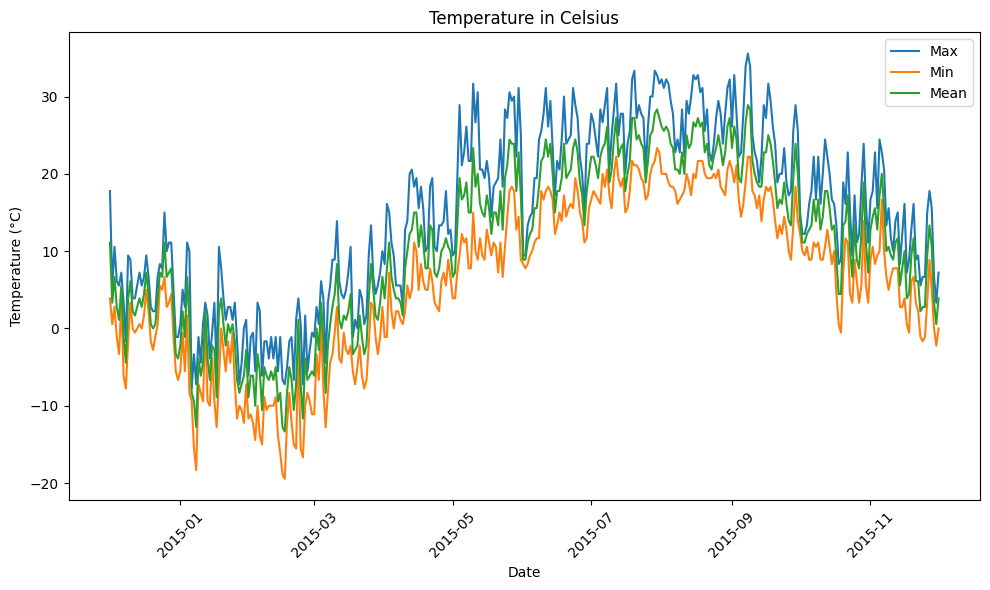

In [165]:
# Seleccionar las columnas relevantes
weatherTempF = weatherpivot[['date', 'Max.TemperatureF', 'Min.TemperatureF', 'Mean.TemperatureF']].copy()

# Convertir las columnas específicas a numéricas, poniendo NaN donde no sea posible
weatherTempF.loc[:, ['Max.TemperatureF', 'Min.TemperatureF', 'Mean.TemperatureF']] = \
    weatherTempF[['Max.TemperatureF', 'Min.TemperatureF', 'Mean.TemperatureF']].apply(pd.to_numeric, errors='coerce')

# Eliminar las filas que contienen NaN en las columnas especificadas
weatherTempF = weatherTempF.dropna(subset=['Max.TemperatureF', 'Min.TemperatureF', 'Mean.TemperatureF'])

# Función para convertir Fahrenheit a Celsius
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) * 5/9

# Convertir las temperaturas a Celsius de manera segura usando .loc
weatherTempF.loc[:, 'Max.TemperatureC'] = fahrenheit_to_celsius(weatherTempF['Max.TemperatureF'])
weatherTempF.loc[:, 'Min.TemperatureC'] = fahrenheit_to_celsius(weatherTempF['Min.TemperatureF'])
weatherTempF.loc[:, 'Mean.TemperatureC'] = fahrenheit_to_celsius(weatherTempF['Mean.TemperatureF'])

# Crear un nuevo dataframe con los valores en Celsius
weatherTempC = weatherTempF[['date', 'Max.TemperatureC', 'Min.TemperatureC', 'Mean.TemperatureC']].copy()

# Graficar las temperaturas
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(weatherTempC['date'], weatherTempC['Max.TemperatureC'], label='Max')
plt.plot(weatherTempC['date'], weatherTempC['Min.TemperatureC'], label='Min')
plt.plot(weatherTempC['date'], weatherTempC['Mean.TemperatureC'], label='Mean')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Celsius')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Guardar el dataframe en un archivo CSV
weatherTempC.to_csv('weatherTempC.csv', index=False)

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

n_steps = 10  # Usaremos los últimos 10 días
X = []
y = []

# Crear ventanas deslizantes (sliding windows)
for i in range(len(weatherTempC) - n_steps):
    X.append(weatherTempC['Mean.TemperatureC'].iloc[i:i + n_steps].values)
    y.append(weatherTempC['Mean.TemperatureC'].iloc[i + n_steps])

X = np.array(X)
y = np.array(y)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
score = model.score(X_test, y_test)
print(f"R² del modelo: {score:.2f}")

# Extraer los últimos 10 días del conjunto de datos
last_10_days = weatherTempC['Mean.TemperatureC'].iloc[-n_steps:].values.reshape(1, -1)

# Predecir la temperatura del siguiente día
next_day_temperature = model.predict(last_10_days)
print(f"Temperatura predicha para el siguiente día: {next_day_temperature[0]:.2f}")

# Guardar el modelo entrenado (opcional)
import joblib
joblib.dump(model, "model.pkl")

R² del modelo: 0.90
Temperatura predicha para el siguiente día: 4.98


['model.pkl']